In [5]:
import matplotlib.pyplot as plt

from scripts import tabular_baselines

import seaborn as sns
import numpy as np

from datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids
from scripts.tabular_baselines import *
from scripts.tabular_evaluation import evaluate
from scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from scripts import tabular_metrics

In [6]:
from notebook_utils import *

In [7]:
%load_ext autoreload

%autoreload 2

# Datasets

In [ ]:
cc_test_datasets_multiclass, cc_test_datasets_multiclass_df = load_openml_list(open_cc_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


In [9]:
def get_datasets(selector, task_type, suite='openml'):
    if task_type == 'binary':
        ds = valid_datasets_binary if selector == 'valid' else test_datasets_binary
    else:
        if suite == 'openml':
            ds = valid_datasets_multiclass if selector == 'valid' else test_datasets_multiclass
        elif suite == 'cc':
            ds = valid_datasets_multiclass if selector == 'valid' else cc_test_datasets_multiclass
        else:
            raise Exception("Unknown suite")
    return ds

# Setting params

In [13]:
eval_positions = [1000]
max_features = 100
bptt = 2000
selector = 'test'
base_path = os.path.join('.')
overwrite=False
max_times = [0.5, 1, 15, 30, 60, 60*5, 60*15, 60*60]
metric_used = tabular_metrics.auc_metric
baseline_methods = ['logistic', 'gp', 'knn', 'catboost', 'xgb', 'autosklearn2', 'autogluon']
task_type = 'multiclass'

In [14]:
suite = 'cc'
test_datasets = get_datasets('test',task_type, suite=suite)

In [15]:
clf_dict= {'gp': gp_metric
                , 'knn': knn_metric
                , 'catboost': catboost_metric
                , 'xgb': xgb_metric
                , 'logistic': logistic_metric
           , 'autosklearn': autosklearn_metric
             , 'autosklearn2': autosklearn2_metric
            , 'autogluon': autogluon_metric}

In [16]:
device = 'cpu'

def eval_method(task_type, method, dids, selector, eval_positions, max_time, metric_used, split_number, append_metric=True, fetch_only=False, verbose=False):
    
    dids = dids if type(dids) is list else [dids]
    
    for did in dids:

        ds = get_datasets(selector, task_type, suite=suite)

        ds = ds if did is None else ds[did:did+1]

        clf = clf_dict[method]

        time_string = '_time_'+str(max_time) if max_time else ''
        metric_used_string = '_'+tabular_baselines.get_scoring_string(metric_used, usage='') if append_metric else ''

        result = evaluate(datasets=ds
                          , model=clf
                          , method=method+time_string+metric_used_string
                          , bptt=bptt, base_path=base_path
                          , eval_positions=eval_positions
                          , device=device, max_splits=1
                          , overwrite=overwrite
                          , save=True
                          , metric_used=metric_used
                          , path_interfix=task_type
                          , fetch_only=fetch_only
                          , split_number=split_number
                          , verbose=verbose
                          , max_time=max_time)
    
    return result

# Baseline Evaluation
This section runs baselines and saves results locally.

In [18]:
!mkdir {base_path}/results
!mkdir {base_path}/results/tabular/
!mkdir {base_path}/results/tabular/multiclass/

In [ ]:
# RUN ONE METHOD ON ONE DATASET AND SPLIT
overwrite=True
dataset_id = 1
split_number = 1
maximum_runtime = 30
r = eval_method(task_type, 'logistic', dataset_id, 'test', eval_positions, maximum_runtime, metric_used, split_number)

In [16]:
# RUN ALL METHODS, SPLITS AND DATASETS
test_datasets = get_datasets('test',task_type, suite=suite)

overwrite=True
jobs = [
    eval_method(task_type, m, did, selector, eval_positions, max_time, metric_used, split_number)
    for did in range(0, len(test_datasets))
    for selector in ['test']
    for m in baseline_methods
    for max_time in max_times
    for split_number in [1, 2, 3, 4, 5]
]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


  1%|          | 55/10000 [00:00<03:00, 55.10trial/s, best loss: -0.8863847736625514]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:01<?, ?it/s]
/home/hollmann/anaconda3/envs/prior-fitting/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)



saved results to /work/dlclarge1/hollmann-PFN_Tabular/results/tabular/multiclass/results_knn_time_1_roc_auc_balance-scale_312_624_1.npy


Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


  1%|          | 56/10000 [00:01<02:59, 55.48trial/s, best loss: -0.8772490470501223]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:01<?, ?it/s]
/home/hollmann/anaconda3/envs/prior-fitting/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)



saved results to /work/dlclarge1/hollmann-PFN_Tabular/results/tabular/multiclass/results_knn_time_1_roc_auc_balance-scale_312_624_2.npy


Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


  1%|          | 56/10000 [00:00<02:57, 56.08trial/s, best loss: -0.8500099553224553]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:01<?, ?it/s]
/home/hollmann/anaconda3/envs/prior-fitting/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)



saved results to /work/dlclarge1/hollmann-PFN_Tabular/results/tabular/multiclass/results_knn_time_1_roc_auc_balance-scale_312_624_3.npy


Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


  1%|          | 55/10000 [00:01<03:02, 54.62trial/s, best loss: -0.9098604269293926]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:01<?, ?it/s]
/home/hollmann/anaconda3/envs/prior-fitting/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)



saved results to /work/dlclarge1/hollmann-PFN_Tabular/results/tabular/multiclass/results_knn_time_1_roc_auc_balance-scale_312_624_4.npy


Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 9/10000 [00:00<03:13, 51.64trial/s, best loss: -0.8254093583470825]

Calculating splits<function knn_metric at 0x7f3636e0aaf0> 312:   0%|          | 0/1 [00:00<?, ?it/s]


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/hollmann/anaconda3/envs/prior-fitting/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3318773/475731429.py", line 4, in <module>
    jobs = [
  File "/tmp/ipykernel_3318773/475731429.py", line 5, in <listcomp>
    eval_method(task, m, did, selector, eval_positions, max_time, metric_used, split_number)
  File "/tmp/ipykernel_3318773/551782496.py", line 18, in eval_method
    result = evaluate(datasets=ds
  File "/home/hollmann/prior-fitting-release/scripts/tabular_evaluation.py", line 118, in evaluate
    r = evaluate_position(X, y
  File "/home/hollmann/prior-fitting-release/scripts/tabular_evaluation.py", line 266, in evaluate_position
    _, outputs, best_configs = baseline_predict(model, eval_xs, eval_ys, categorical_feats
  File "/home/hollmann/prior-fitting-release/scripts/baseline_prediction_interface.py", line 24, in 

TypeError: object of type 'NoneType' has no len()

# Comparison

In [20]:
methods = baseline_methods + ['transformer']

In [23]:
pos = str(eval_positions[0])

global_results = {}
overwrite=False

for method in baseline_methods:
    for max_time in max_times:
        for split_number in range(1,5+1):
            global_results[method+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)] = eval_method(task_type, method,  None, selector, 
                                                                                                                                    eval_positions, fetch_only=True, 
                                                                                                                                    verbose=False, max_time=max_time,
                                                                                                                                    metric_used=metric_used, split_number=split_number)

Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_balance-scale_312_624_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_mfeat-fourier_1000_2000_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_breast-w_349_698_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_mfeat-karhunen_1000_2000_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_mfeat-morphological_1000_2000_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_mfeat-zernike_1000_2000_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_cmc_736_1472_1.npy
Could not load saved result for ./results/tabular/multiclass/results_logistic_time_0.5_roc_auc_credit-approval_345_690_1.npy
Could not loa

In [24]:
path_ = 'prior_tuning_result.pkl'

try:
    output = open(path_, 'rb')
    _, metrics, _, _, _, _ = CustomUnpickler(output).load()
except:
    output = open(path_, 'rb')
    _, metrics, _, _, _ = CustomUnpickler(output).load()
if isinstance(metrics, list):
    for i in range(1, len(metrics[1])+1):
        global_results['transformer_split_'+str(i)] = metrics[2][i-1]

In [25]:
# Verify integrity of results
for bl in set(global_results.keys()):
    if 'split_1' in bl:
        for ds in test_datasets:
            if f'{ds[0]}_ys_at_1000' not in global_results[bl]:
                continue
            match = (global_results[bl][f'{ds[0]}_ys_at_1000'] == global_results['transformer_split_1'][f'{ds[0]}_ys_at_1000']).float().mean()
            if not match:
                raise Exception("Not the same labels used")
            

In [26]:
limit_to = ''
calculate_score(tabular_metrics.auc_metric, 'roc', global_results, test_datasets, eval_positions + [-1], limit_to=limit_to)
calculate_score(tabular_metrics.cross_entropy, 'cross_entropy', global_results, test_datasets, eval_positions + [-1], limit_to=limit_to)
calculate_score(tabular_metrics.accuracy_metric, 'acc', global_results, test_datasets, eval_positions + [-1])
calculate_score(tabular_metrics.time_metric, 'time', global_results, test_datasets, eval_positions + [-1], aggregator='sum', limit_to=limit_to)
calculate_score(tabular_metrics.time_metric, 'time', global_results, test_datasets, eval_positions + [-1], aggregator='mean', limit_to=limit_to)
calculate_score(tabular_metrics.count_metric, 'count', global_results, test_datasets, eval_positions + [-1], aggregator='sum', limit_to=limit_to)

#### ROC and AUC plots from TabPFN Paper

In [27]:
def generate_ranks_and_wins_table(global_results_filtered, metric_key, max_time, split_number, time_matrix):
    global_results_filtered_split = {**global_results_filtered}
    global_results_filtered_split = {k: global_results_filtered_split[k] for k in global_results_filtered_split.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number) in k or 'transformer_split_'+str(split_number) in k}

    matrix, matrix_stds = make_metric_matrix(global_results_filtered_split, methods, pos, metric_key, test_datasets)
    for method in methods:
        if time_matrix[method] > max_time * 2:
            matrix[method] = np.nan
        # = np.nan

    if metric_key == 'cross_entropy':
        matrix = -(matrix.fillna(-100))
    else:
        matrix = matrix.fillna(-1)
    return make_ranks_and_wins_table(matrix.copy())

In [28]:
%matplotlib inline

df_ = []
metric_keys = ['roc', 'cross_entropy', 'time']

for max_time in max_times:
    global_results_filtered = {**global_results}
    global_results_filtered = {k: global_results_filtered[k] for k in global_results_filtered.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_' in k or 'transformer' in k}
    
    time_matrix, _ = make_metric_matrix(global_results_filtered, methods, pos, 'time', test_datasets)
    time_matrix = time_matrix.mean()
    
    if len(global_results_filtered) == 0:
        continue
        
    # Calculate ranks and wins per split
    for metric_key in metric_keys:
        for split_number in range(1,6):
            ranks, wins = generate_ranks_and_wins_table(global_results_filtered, metric_key, max_time, split_number, time_matrix)

            for method in methods:
                method_ = method+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='') if method != 'transformer' else method
                global_results[method_+'_split_'+str(split_number)]['mean_rank_'+metric_key+f'_at_{pos}'] = ranks[method]
                global_results[method_+'_split_'+str(split_number)]['mean_wins_'+metric_key+f'_at_{pos}'] = wins[method]
    
    #for method in global_results.keys():
    #    global_results[method]['mean_rank_'+metric_key+f'_at_{pos}'] = ranks[]
    
    avg_times = {}
    for method_ in methods:
        avg_times[method_] = []
        for split_number in range(1,6):
            if method_ != 'transformer':
                method = method_+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)
            else:
                method = method_+'_split_'+str(split_number)
            avg_times[method_] += [global_results[method][f'mean_time_at_{pos}']]
    avg_times = pd.DataFrame(avg_times).mean()
    
    for metric_key in metric_keys:
        for ranking in ['', 'rank_', 'wins_']:
            for method_ in methods:
                for split_number in range(1,6):
                    method = method_
                    if method_ != 'transformer':
                        method = method_+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)
                    else:
                        method = method_+'_split_'+str(split_number)

                    if global_results[method][f'sum_count_at_{pos}'] <= 29:
                        print('Warning not all datasets generated for '+method+' '+ str(global_results[method][f'sum_count_at_{pos}']))
                        
                    time = global_results[method]['mean_time'] if ranking == '' else max_time
                    time = max_time # Todo: This is not the real time
                    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': avg_times[method_], 'time': time, 'method': method_, 'split_number': split_number}]
                    # For Roc AUC Plots
                    #if 'transformer' in method:
                    #    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': avg_times[method_], 'time': time, 'method': method_, 'split_number': split_number}]
                    #    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': max(avg_times), 'time': max(max_times), 'method': method_, 'split_number': split_number}]
                            
            
df_ = pd.DataFrame(df_)

In [29]:
metric_renamer = {'roc': 'ROC AUC', 'cross_entropy': 'Cross entropy'
                  , 'rank_roc': 'Mean ROC AUC Rank', 'rank_cross_entropy': 'Mean Cross entropy Rank'
                  , 'wins_roc': 'Mean ROC AUC Wins', 'wins_cross_entropy': 'Mean Cross entropy Wins'
                  , 'time': 'actual time taken'}
max_times_renamer = {0.5: "0.5s", 1: "1s", 5: "5s", 15: "15s", 30: "30s", 60: "1min", 300: "5min", 900: "15min", 3600: "1h", 14400: "4h"}

def make_tabular_results_plot(metric_key, exclude, max_times, df_, grouping=True):
    f, ax = plt.subplots(figsize=(7, 7))
    #ax.set(xscale="log")
    
    df_.loc[:, 'time_log'] = np.log10(df_.time)
    df_.loc[:, 'real_time_log'] = np.log10(df_.real_time)
    time_column = 'time_log' if grouping else 'real_time_log'

    sns.set_palette("tab10")
    for method in methods:
        if method in exclude or method=='transformer':
            continue
        df_method = df_[df_.method==method].copy()
        ax = sns.lineplot(time_column, 'metric'+metric_key, data=df_method, marker='o', label=method, ax=ax)
    #sns.scatterplot(data=df_, x='time', y='metric', hue='method', ax=ax, style='method') #
    df_trans = df_[df_.method=='transformer']
    if time_column == 'real_time_log':
        # Removing dots for line for transformers
        df_trans = df_trans[np.logical_or(df_trans.real_time == df_trans.real_time.min(), df_trans.real_time == df_trans.real_time.max())]
        df_trans.loc[:, 'metric'+metric_key] = df_trans['metric'+metric_key].mean()
        df_trans.loc[:, time_column] = np.log(1) # Hacky code to get the right time from our measurements
    ax = sns.lineplot(time_column, 'metric'+metric_key, data=df_trans, linestyle='--', marker='o', ci="sd", ax=ax)
    
    #ax = sns.scatterplot(data = df_trans, x=time_column, y='metric'+metric_key, s=800, marker='*', color='grey') #
    #ax = plt.scatter(df_trans[time_column], df_trans['metric'+metric_key], s=600, marker=['*']) #
    
    if grouping:
        ax.set_xlabel("Time (s, requested, not actual)")
    else:
        ax.set_xlabel("Time taken")
    ax.set_ylabel(metric_renamer[metric_key])

    #ax.legend()
    
    times = np.log10(max_times)
    ax.set_xticks(times)
    ax.set_xticklabels([max_times_renamer[t] for t in max_times])
    
    #ax.legend([],[], frameon=False)
    
    return ax

In [30]:
df_absolute = df_.copy()

In [31]:
df_absolute = df_.copy()
df_absolute = df_absolute[np.logical_or(df_.method != 'autogluon', df_.time >= 30)] # Autogluon did not yield any useful results before 30s

knn_extend = df_absolute[np.logical_and(df_absolute.method=='knn', df_absolute.time == 3600)].copy()
knn_extend['real_time'] = 14400
knn_extend['time'] = 14400
df_absolute = df_absolute.append(knn_extend, ignore_index=True).reindex()

knn_extend = df_absolute[np.logical_and(df_absolute.method=='logistic', df_absolute.time == 3600)].copy()
knn_extend['real_time'] = 14400
knn_extend['time'] = 14400

df_absolute = df_absolute.append(knn_extend, ignore_index=True).reindex()

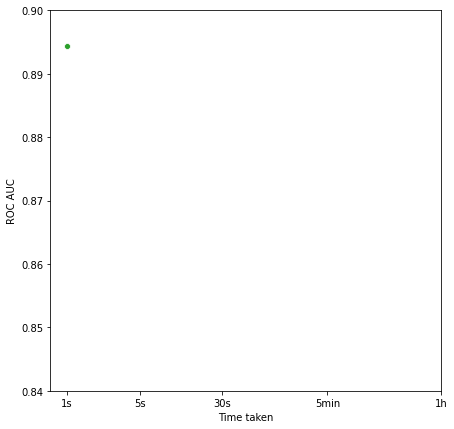

In [34]:
exclude=['']
#ax = make_tabular_results_plot('time', exclude=exclude)
ax = make_tabular_results_plot('roc', df_=df_absolute, exclude=exclude, grouping=False, max_times=[1, 5, 30, 60*5, 60*60])
ax.set_ylim([0.84, 0.9])
ax.set_xlim([np.log10(0.7), np.log10(3600)])
ax.legend([],[], frameon=False)

#tikzplotlib.save(f'roc_over_time.tex', axis_height='5cm', axis_width='6cm', strict=True)

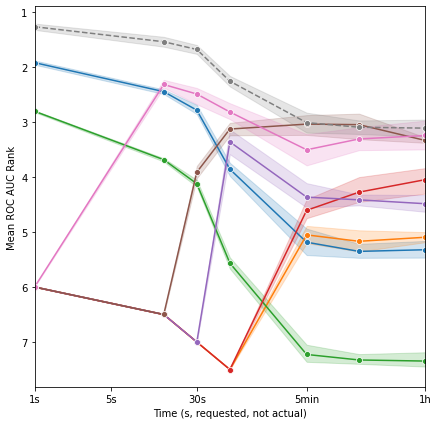

In [134]:
ax = make_tabular_results_plot('rank_roc', df_=df_[df_.time >= 1].copy(), exclude=['tabnet'], max_times=[1, 5, 30, 60*5, 60*60])
ax.invert_yaxis()
ax.set_xlim([np.log10(1.0), np.log10(3600)])
ax.legend([],[], frameon=False)
tikzplotlib.save(f'roc_raks_tabular.tex', axis_height='5cm', axis_width='6cm', strict=True)

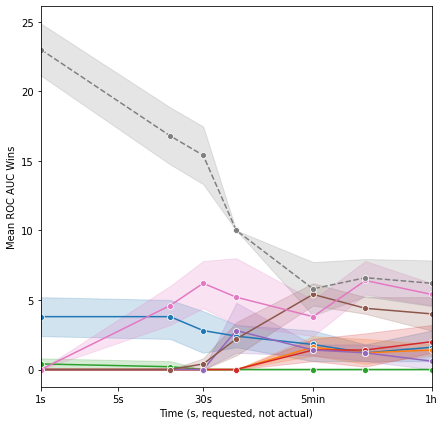

In [135]:
ax = make_tabular_results_plot('wins_roc', df_=df_[df_.time >= 1].copy(), exclude=exclude, max_times=[1, 5, 30, 60*5, 60*60])
ax.set_xlim([np.log10(1.0), np.log10(3600)])
ax.legend([],[], frameon=False)
tikzplotlib.save(f'roc_wins_tabular.tex', axis_height='5cm', axis_width='6cm', strict=True)

#### Big Table metrics

In [79]:
max_time = '3600'

In [80]:
global_results_filtered = {**global_results}
global_results_filtered = {k: global_results_filtered[k] for k in global_results_filtered.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_' in k or 'transformer' in k}


In [84]:
roc_matrix, roc_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'roc', test_datasets_multiclass_filtered)
acc_matrix, acc_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'acc', test_datasets_multiclass_filtered)
cross_entropy_matrix, cross_entropy_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'cross_entropy', test_datasets_multiclass_filtered)
time_matrix, time_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'time', test_datasets_multiclass_filtered)

roc_rank, rocs_wins = make_ranks_and_wins_table(roc_matrix.copy())
acc_rank, acc_wins = make_ranks_and_wins_table(acc_matrix.copy())
cross_entropy_rank, cross_entropy_wins = make_ranks_and_wins_table(-cross_entropy_matrix.copy())

In [85]:
def wins_vs_idx(matrix, idx):
    wins_auc = np.array([[(matrix.values[:, j] < matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    ties_auc = np.array([[(matrix.values[:, j] == matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    losses_auc = np.array([[(matrix.values[:, j] > matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    
    return wins_auc, ties_auc, losses_auc

transformer_idx = np.where(roc_matrix.columns == 'transformer')[0][0]

wins_roc_vs_us, ties_roc_vs_us, losses_roc_vs_us = wins_vs_idx(roc_matrix, transformer_idx)
wins_acc_vs_us, ties_acc_vs_us, losses_acc_vs_us = wins_vs_idx(acc_matrix, transformer_idx)
wins_ce_vs_us, ties_ce_vs_us, losses_ce_vs_us = wins_vs_idx(-cross_entropy_matrix, transformer_idx)

In [86]:
def rename(table):
    return table.rename(columns=relabeler).T.rename(columns={'blood-transfusion-service-center': 'blood-transfus..'
                                                                , 'jungle_chess_2pcs_raw_endgame_complete': 'jungle\_chess..', 'bank-marketing': 'bank-market..'}).T

def get_suffix(i, k):
    suffix = ''
    suffix = suffix+'s' if test_datasets[i][5]['samples_capped'] == True else suffix
    suffix = suffix+'f' if test_datasets[i][5]['feats_capped'] == True else suffix
    suffix = suffix+'c' if test_datasets[i][5]['classes_capped'] == True else suffix
    suffix = '' if len(suffix) == 0 else f' [{suffix}]'
    
    return k + suffix

In [87]:
relabeler = {'transformer': 'Tabular PFN'
             , 'autogluon': 'Autogluon'
             , 'autosklearn2': 'Autosklearn2'
             , 'gp': 'GP (RBF)'
             , 'logistic': 'Log. Regr.'
             , 'knn': 'KNN'
             , 'catboost': 'Catboost'
            , 'xgb': 'XGB'}

In [88]:
table = roc_matrix.copy()
#table = roc_ovr_matrix.copy()
#table = acc_matrix.copy()
#table = cross_entropy_matrix.copy()

#table = table_acc
table.index = [get_suffix(i, k) for i, k in enumerate(table.index[0:table.shape[0]])]

table.loc['Wins AUC OVO'] = rocs_wins.values
#table.loc['Mean AUC OVR'] = roc_ovr_matrix.mean(skipna=True)
table.loc['Wins Acc.'] = acc_wins.values
#table.loc['Mean Bal. Acc.'] = balanced_acc_matrix.mean()
table.loc['Wins CE'] = cross_entropy_wins.values

table.loc['Win/T/L AUC vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_roc_vs_us[-1, :], ties_roc_vs_us[-1, :], losses_roc_vs_us[-1, :])]
table.loc['Win/T/L Acc vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_acc_vs_us[-1, :], ties_acc_vs_us[-1, :], losses_acc_vs_us[-1, :])]
table.loc['Win/T/L CE vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_ce_vs_us[-1, :], ties_ce_vs_us[-1, :], losses_ce_vs_us[-1, :])]

table.loc['Mean AUC OVO'] = roc_matrix.mean(skipna=True)
table.loc['Mean AUC OVO Stds'] = roc_matrix_stds.mean(skipna=True)

#table.loc['Mean AUC OVR'] = roc_ovr_matrix.mean(skipna=True)
table.loc['Mean Acc.'] = acc_matrix.mean()
table.loc['Mean Acc. Stds'] = acc_matrix_stds.mean(skipna=True)

#table.loc['Mean Bal. Acc.'] = balanced_acc_matrix.mean()
table.loc['Mean CE'] = cross_entropy_matrix.mean()
table.loc['Mean CE Stds'] = cross_entropy_matrix_stds.mean()

table.loc['M. rank AUC OVO'] = roc_rank.values
#table.loc['Mean rank AUC OVR'] = roc_ovr_rank.values
table.loc['Mean rank Acc.'] = acc_rank.values
#table.loc['Mean rank Bal. Acc.'] = balanced_acc_rank.values
table.loc['Mean rank CE'] = cross_entropy_rank.values

table.loc['Mean time (s)'] = time_matrix.mean()
table.loc['Mean time (s)', 'knn'] = 0.5
table.loc['Mean time (s)', 'logistic'] = 60

table = table[['knn', 'logistic', 'gp', 'catboost', 'xgb', 'autosklearn2', 'autogluon', 'transformer']]
rename(table).round(decimals=3).style.highlight_max(axis = 1, props= 'font-weight: bold;').format(precision=3)

,KNN,Log. Regr.,GP (RBF),Catboost,XGB,Autosklearn2,Autogluon,Tabular PFN
balance-scale,0.880,0.962,0.983,0.924,0.994,0.997,0.992,0.996
mfeat-fourier,0.970,0.976,0.923,0.982,0.980,0.983,0.984,0.982
breast-w,0.984,0.994,0.992,0.993,0.990,0.994,0.993,0.993
mfeat-karhunen,0.994,0.995,0.915,0.999,0.998,0.998,0.999,0.998
mfeat-morphological,0.951,0.964,0.959,0.963,0.961,0.967,0.970,0.968
mfeat-zernike,0.976,0.979,0.981,0.976,0.973,0.981,0.794,0.983
cmc,0.634,0.675,0.673,0.726,0.730,0.738,0.733,0.726
credit-approval,0.914,0.912,0.921,0.939,0.942,0.941,0.941,0.932
credit-g,0.726,0.760,0.778,0.782,0.785,0.793,0.794,0.790
diabetes,0.806,0.837,0.847,0.838,0.838,0.834,0.839,0.842


In [89]:
def bold_extreme_values(data, format_string="%.3g", max_=True):
    data = data.astype(float).round(3)
    if max_:
        extrema = data != data.max()
    else:
        extrema = data != data.min()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 

def to_str(data, format_string="%.3g"):
    formatted = data.apply(lambda x : format_string % x)
    return formatted

In [90]:
keys_max = ["Mean rank CE", "Mean rank Acc.", "Mean rank AUC OVO", "Mean rank AUC OVR", "Mean rank Bal. Acc.", "Mean AUC OVO", "Mean Acc."]
keys_max = ["Mean AUC OVO", "Mean Acc.", "Wins AUC OVO", "Wins Acc.", "Wins CE"]

keys_min = ["Mean rank CE", "Mean rank Acc.", "M. rank AUC OVO", "Mean CE"]

table_latex = rename(table).copy()

table_latex.iloc[0:30] = table_latex.iloc[0:30].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.loc[["Mean time (s)"]] = table_latex.loc[["Mean time (s)"]].apply(lambda data : bold_extreme_values(data, format_string="%.4g", max_=False), axis=1)
table_latex.loc[keys_max] = table_latex.loc[keys_max].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.loc[keys_min] = table_latex.loc[keys_min].apply(lambda data : bold_extreme_values(data, max_=False),axis=1)

table_latex.loc[['Mean CE Stds']] = table_latex.loc[['Mean CE Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean CE'] = table_latex.loc['Mean CE'] + '$\pm$' + table_latex.loc['Mean CE Stds']
table_latex = table_latex.drop(['Mean CE Stds'])

table_latex.loc[['Mean Acc. Stds']] = table_latex.loc[['Mean Acc. Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean Acc.'] = table_latex.loc['Mean Acc.'] + '$\pm$' + table_latex.loc['Mean Acc. Stds']
table_latex = table_latex.drop(['Mean Acc. Stds'])

table_latex.loc[['Mean AUC OVO Stds']] = table_latex.loc[['Mean AUC OVO Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean AUC OVO'] = table_latex.loc['Mean AUC OVO'] + '$\pm$' + table_latex.loc['Mean AUC OVO Stds']
table_latex = table_latex.drop(['Mean AUC OVO Stds'])

table_latex
#print(table_latex.to_latex(escape=False))

,KNN,Log. Regr.,GP (RBF),Catboost,XGB,Autosklearn2,Autogluon,Tabular PFN
balance-scale,0.88,0.962,0.983,0.924,0.994,\textbf{0.997},0.992,0.996
mfeat-fourier,0.97,0.976,0.923,0.982,0.98,0.983,\textbf{0.984},0.982
breast-w,0.984,\textbf{0.994},0.992,0.993,0.99,\textbf{0.994},0.993,0.993
mfeat-karhunen,0.994,0.995,0.915,\textbf{0.999},0.998,0.998,\textbf{0.999},0.998
mfeat-morphological,0.951,0.964,0.959,0.963,0.961,0.967,\textbf{0.97},0.968
mfeat-zernike,0.976,0.979,0.981,0.976,0.973,0.981,0.794,\textbf{0.983}
cmc,0.634,0.675,0.673,0.726,0.73,\textbf{0.738},0.733,0.726
credit-approval,0.914,0.912,0.921,0.939,\textbf{0.942},0.941,0.941,0.932
credit-g,0.726,0.76,0.778,0.782,0.785,0.793,\textbf{0.794},0.79
diabetes,0.806,0.837,\textbf{0.847},0.838,0.838,0.834,0.839,0.842


In [91]:
print(table_latex.to_latex(escape=False))

\begin{tabular}{lllllllll}
\toprule
{} &              KNN &       Log. Regr. &         GP (RBF) &         Catboost &              XGB &             Autosklearn2 &                Autogluon &                Tabular PFN \\
\midrule
balance-scale                    &             0.88 &            0.962 &            0.983 &            0.924 &            0.994 &           \textbf{0.997} &                    0.992 &                      0.996 \\
mfeat-fourier                    &             0.97 &            0.976 &            0.923 &            0.982 &             0.98 &                    0.983 &           \textbf{0.984} &                      0.982 \\
breast-w                         &            0.984 &   \textbf{0.994} &            0.992 &            0.993 &             0.99 &           \textbf{0.994} &                    0.993 &                      0.993 \\
mfeat-karhunen                   &            0.994 &            0.995 &            0.915 &   \textbf{0.999} &            0.998 &

In [92]:
table_latex_small = table_latex.iloc[-len(keys_min+keys_max)-1-3:]
table_latex_small

,KNN,Log. Regr.,GP (RBF),Catboost,XGB,Autosklearn2,Autogluon,Tabular PFN
Wins AUC OVO,0,0,3,0,1,4,5,\textbf{10}
Wins Acc.,0,2,1,1,3,4,5,\textbf{11}
Wins CE,0,0,2,1,2,3,9,\textbf{12}
Win/T/L AUC vs Us,2/0/28,3/0/27,4/1/25,7/0/23,5/0/25,11/1/18,14/1/15,0/0/0
Win/T/L Acc vs Us,2/0/28,5/0/25,6/1/23,8/0/22,10/0/20,11/1/18,11/0/19,0/0/0
Win/T/L CE vs Us,0/0/30,1/0/29,4/0/26,5/0/25,7/0/23,8/0/22,14/0/16,0/0/0
Mean AUC OVO,0.849$\pm$0.015,0.879$\pm$0.011,0.873$\pm$0.027,0.89$\pm$0.011,0.891$\pm$0.011,\textbf{0.894}$\pm$0.01,0.882$\pm$0.039,\textbf{0.894}$\pm$0.0097
Mean Acc.,0.785$\pm$0.016,0.808$\pm$0.013,0.786$\pm$0.058,0.818$\pm$0.011,0.821$\pm$0.013,0.821$\pm$0.016,0.818$\pm$0.04,\textbf{0.826}$\pm$0.011
Mean CE,1.79$\pm$1.1,0.77$\pm$0.024,0.849$\pm$0.052,0.767$\pm$0.062,0.758$\pm$0.047,0.815$\pm$0.06,\textbf{0.73}$\pm$0.037,0.731$\pm$0.015
M. rank AUC OVO,7.43,5.4,5.3,4.07,4.53,3.13,3.32,\textbf{2.82}


In [438]:
print(table_latex_small.to_latex(escape=False))

\begin{tabular}{lllllllll}
\toprule
{} &              KNN &       Log. Regr. &         GP (RBF) &         Catboost &              XGB &               Autosklearn2 &                Autogluon &               Tabular PFN \\
\midrule
Wins AUC OVO      &                0 &                0 &                2 &                0 &                1 &                          5 &                        5 &                \textbf{8} \\
Wins Acc.         &                0 &                3 &                1 &                2 &                1 &                          4 &                        6 &               \textbf{10} \\
Wins CE           &                0 &                0 &                1 &                0 &                2 &                          1 &              \textbf{13} &                        11 \\
Win/T/L AUC vs Us &           2/0/28 &           3/0/27 &           3/1/26 &           7/1/22 &           5/0/25 &                    11/1/18 &                  13/1/16 &

In [1130]:
table_latex = table.copy()

table_latex.iloc[:-5] = table_latex.iloc[:-5].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.iloc[-5:-5] = table_latex.iloc[-5:-5].apply(lambda data : bold_extreme_values(data, max_=False),axis=1)

table_latex
#print(table_latex.to_latex(escape=False))

,logistic,gp,knn,catboost,xgb,autosklearn2,autogluon,tabnet,transformer
balance-scale,0.962,0.983,0.880,0.926,0.979,\textbf{0.997},0.993,0.918,0.996
mfeat-fourier,0.976,0.923,0.970,0.981,0.980,0.983,\textbf{0.985},0.899,0.980
breast-w,\textbf{0.994},0.992,0.984,0.993,0.992,\textbf{0.994},0.993,0.983,0.992
mfeat-karhunen,0.995,0.915,0.994,\textbf{0.999},0.998,0.998,\textbf{0.999},0.987,0.998
mfeat-morphological,0.964,0.959,0.951,0.963,0.961,0.967,\textbf{0.970},0.886,0.967
mfeat-zernike,0.979,0.981,0.976,0.976,0.974,0.981,\textbf{0.991},0.952,0.983
cmc,0.675,0.673,0.634,0.726,0.724,\textbf{0.738},0.734,0.659,0.727
credit-approval,0.912,0.921,0.914,0.939,0.940,0.941,\textbf{0.943},0.852,0.932
credit-g,0.760,0.778,0.726,0.782,0.780,\textbf{0.793},0.792,0.710,0.787
diabetes,0.837,\textbf{0.847},0.806,0.838,0.831,0.834,0.837,0.748,0.843


In [230]:
rename(table[-7:]).round(decimals=3).style.highlight_min(axis = 1, props= 'font-weight: bold;').format(precision=3)

,Log. Regr.,GP,KNN,Catboost,XGB,autosklearn,autosklearn_fast,h2o,h2o_fast,transformer,diff
Mean Bal. Acc.,0.461,0.593,0.628,0.684,0.645,0.683,0.671,0.693,0.701,0.669,0.015
Mean CE,0.989,0.787,1.223,0.808,0.844,1.011,0.910,0.935,0.833,0.820,-0.011
Mean rank AUC,7.889,6.708,8.375,4.208,4.639,4.139,4.708,4.278,5.014,5.042,-0.833
Mean rank AUC OVR,7.889,6.708,8.431,4.153,4.569,4.250,4.764,4.250,4.944,5.042,-0.889
Mean rank Acc.,8.069,7.319,7.583,4.111,4.556,3.764,4.403,4.458,5.139,5.597,-1.486
Mean rank Bal. Acc.,8.306,7.292,7.319,3.819,4.917,3.847,4.556,4.361,5.069,5.514,-1.694
Mean rank CE,5.500,5.500,5.500,5.500,5.500,5.500,5.500,5.500,5.500,5.500,0.000
